In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
artists=pd.read_json('artists_0-999.json')
transartist=artists.T
transartist.dropna()

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
2wIVse2owClT7go1WT98tk,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 2386591}","[dance pop, hip hop, hip pop, neo soul, pop ra...",https://api.spotify.com/v1/artists/2wIVse2owCl...,2wIVse2owClT7go1WT98tk,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Missy Elliott,70,artist,spotify:artist:2wIVse2owClT7go1WT98tk
26dSoYclwsYLMAKD3tpOr4,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 13836642}","[dance pop, pop]",https://api.spotify.com/v1/artists/26dSoYclwsY...,26dSoYclwsYLMAKD3tpOr4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Britney Spears,80,artist,spotify:artist:26dSoYclwsYLMAKD3tpOr4
6vWDO969PvNqNYHIOW5v0m,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 36504075}","[pop, r&b]",https://api.spotify.com/v1/artists/6vWDO969PvN...,6vWDO969PvNqNYHIOW5v0m,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Beyoncé,87,artist,spotify:artist:6vWDO969PvNqNYHIOW5v0m
31TPClRtHm23RisEBtV3X7,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 13667356}","[dance pop, pop]",https://api.spotify.com/v1/artists/31TPClRtHm2...,31TPClRtHm23RisEBtV3X7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Justin Timberlake,82,artist,spotify:artist:31TPClRtHm23RisEBtV3X7
5EvFsr3kj42KNv97ZEnqij,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 2099287}","[pop rap, reggae fusion]",https://api.spotify.com/v1/artists/5EvFsr3kj42...,5EvFsr3kj42KNv97ZEnqij,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shaggy,71,artist,spotify:artist:5EvFsr3kj42KNv97ZEnqij
...,...,...,...,...,...,...,...,...,...,...
04BsVprJtIhl2C4fgPEz4W,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 17366}",[],https://api.spotify.com/v1/artists/04BsVprJtIh...,04BsVprJtIhl2C4fgPEz4W,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Layla,21,artist,spotify:artist:04BsVprJtIhl2C4fgPEz4W
5HCypjplgh5uQezvBpOfXN,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 5693}",[channel pop],https://api.spotify.com/v1/artists/5HCypjplgh5...,5HCypjplgh5uQezvBpOfXN,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Jon D,40,artist,spotify:artist:5HCypjplgh5uQezvBpOfXN
1r2kTJ27zuaEoXasQT5NDd,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 2168}",[],https://api.spotify.com/v1/artists/1r2kTJ27zua...,1r2kTJ27zuaEoXasQT5NDd,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Aayushi,18,artist,spotify:artist:1r2kTJ27zuaEoXasQT5NDd
0sHN89qak07mnug3LVVjzP,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 16658}",[australian r&b],https://api.spotify.com/v1/artists/0sHN89qak07...,0sHN89qak07mnug3LVVjzP,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Big Words,34,artist,spotify:artist:0sHN89qak07mnug3LVVjzP


In [3]:
album=pd.read_json('albums_0-999.json')
transalbum=album.T
transalbum.dropna()

,album_type,artists,available_markets,copyrights,external_ids,external_urls,genres,href,id,images,label,name,popularity,release_date,release_date_precision,total_tracks,tracks,type,uri
6vV5UrXcfyQD1wu4Qo2I9K,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",[{'text': '© 2005 Atlantic Recording Corporati...,{'upc': '075678377969'},{'spotify': 'https://open.spotify.com/album/6v...,[],https://api.spotify.com/v1/albums/6vV5UrXcfyQD...,6vV5UrXcfyQD1wu4Qo2I9K,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Atlantic Records/ATG,The Cookbook,64,2005-07-04,day,16,{'href': 'https://api.spotify.com/v1/albums/6v...,album,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K
0z7pVBGOD7HCIB7S8eLkLI,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[{'text': '(P) 2003 Zomba Recording LLC', 'typ...",{'upc': '828765374828'},{'spotify': 'https://open.spotify.com/album/0z...,[],https://api.spotify.com/v1/albums/0z7pVBGOD7HC...,0z7pVBGOD7HCIB7S8eLkLI,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Jive,In The Zone,80,2003-11-13,day,13,{'href': 'https://api.spotify.com/v1/albums/0z...,album,spotify:album:0z7pVBGOD7HCIB7S8eLkLI
25hVFAxTlDvXbx2X2QkUkE,album,[{'external_urls': {'spotify': 'https://open.s...,"[CH, LI]","[{'text': '(P) 2003 Sony Music Entertainment',...",{'upc': '886443814448'},{'spotify': 'https://open.spotify.com/album/25...,[],https://api.spotify.com/v1/albums/25hVFAxTlDvX...,25hVFAxTlDvXbx2X2QkUkE,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Columbia,Dangerously In Love (Alben für die Ewigkeit),17,2003-06-23,day,16,{'href': 'https://api.spotify.com/v1/albums/25...,album,spotify:album:25hVFAxTlDvXbx2X2QkUkE
6QPkyl04rXwTGlGlcYaRoW,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[{'text': '(P) 2002 Zomba Recording LLC', 'typ...",{'upc': '012414182326'},{'spotify': 'https://open.spotify.com/album/6Q...,[],https://api.spotify.com/v1/albums/6QPkyl04rXwT...,6QPkyl04rXwTGlGlcYaRoW,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Jive,Justified,80,2002-11-04,day,13,{'href': 'https://api.spotify.com/v1/albums/6Q...,album,spotify:album:6QPkyl04rXwTGlGlcYaRoW
6NmFmPX56pcLBOFMhIiKvF,album,[{'external_urls': {'spotify': 'https://open.s...,[],"[{'text': '© 2001 MCA Records Inc.', 'type': '...",{'upc': '00008811256524'},{'spotify': 'https://open.spotify.com/album/6N...,[],https://api.spotify.com/v1/albums/6NmFmPX56pcL...,6NmFmPX56pcLBOFMhIiKvF,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Geffen,Hot Shot (International Version #2),5,2000,year,15,{'href': 'https://api.spotify.com/v1/albums/6N...,album,spotify:album:6NmFmPX56pcLBOFMhIiKvF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1Z1AWzi4XaPFpAQLRUphSg,single,[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",[{'text': '© 2014 Hillsong Music & Resources L...,{'upc': '00602537674657'},{'spotify': 'https://open.spotify.com/album/1Z...,[],https://api.spotify.com/v1/albums/1Z1AWzi4XaPF...,1Z1AWzi4XaPFpAQLRUphSg,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hillsong (HIL),The Stand,29,2014-03-11,day,1,{'href': 'https://api.spotify.com/v1/albums/1Z...,album,spotify:album:1Z1AWzi4XaPFpAQLRUphSg
5eJCacLF07CBGvE5QbS6C8,compilation,[{'external_urls': {'spotify': 'https://open.s...,"[AG, AR, AU, BB, BD, BN, BO, BR, BS, BT, BZ, C...",[{'text': '(P) 1995 Sony Music Entertainment (...,{'upc': '074646158623'},{'spotify': 'https://open.spotify.com/album/5e...,[],https://api.spotify.com/v1/albums/5eJCacLF07CB...,5eJCacLF07CBGvE5QbS6C8,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Columbia,Platinum Hits 2000,39,2000-09-05,day,17,{'href': 'https://api.spotify.com/v1/albums/5e...,album,spotify:album:5eJCacLF07CBGvE5QbS6C8
0L62zrqwu44InGe9d4EUmQ,album,[{'external_urls': {'spotify': 'https://open.s...,[],"[{'text': '© 2017 Centricity Music', 'type': '...",{'upc': '00829619142754'}

In [4]:
songs=pd.read_json('songs_0-999.json')
transsongs=songs.T
transsongs.dropna()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0UaMYEvWZi0ZqiDOoHU3YI,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,226863,True,{'isrc': 'USEE10414022'},{'spotify': 'https://open.spotify.com/track/0U...,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,0UaMYEvWZi0ZqiDOoHU3YI,False,Lose Control (feat. Ciara & Fat Man Scoop),69,https://p.scdn.co/mp3-preview/253a76c453026570...,4,track,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI
6I9VzXrHxO9rA9A5euc8Ak,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,198800,False,{'isrc': 'USJI10301005'},{'spotify': 'https://open.spotify.com/track/6I...,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,6I9VzXrHxO9rA9A5euc8Ak,False,Toxic,86,https://p.scdn.co/mp3-preview/6de2791f84c1d637...,6,track,spotify:track:6I9VzXrHxO9rA9A5euc8Ak
0WqIKmW4BTrj3eJFmnCKMv,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[CH, LI]",1,235933,False,{'isrc': 'USSM10305425'},{'spotify': 'https://open.spotify.com/track/0W...,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,0WqIKmW4BTrj3eJFmnCKMv,False,Crazy In Love (feat. Jay-Z),20,https://p.scdn.co/mp3-preview/023ccc9c406cafc5...,1,track,spotify:track:0WqIKmW4BTrj3eJFmnCKMv
1AWQoqb9bSvzTjaLralEkT,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,267266,False,{'isrc': 'USJI10200367'},{'spotify': 'https://open.spotify.com/track/1A...,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,1AWQoqb9bSvzTjaLralEkT,False,Rock Your Body,82,https://p.scdn.co/mp3-preview/a4cdd210220f23d3...,6,track,spotify:track:1AWQoqb9bSvzTjaLralEkT
68vgtRHr7iZHpzGpon6Jlo,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,223440,False,{'isrc': 'USAR10400887'},{'spotify': 'https://open.spotify.com/track/68...,https://api.spotify.com/v1/tracks/68vgtRHr7iZH...,68vgtRHr7iZHpzGpon6Jlo,False,My Boo,85,https://p.scdn.co/mp3-preview/5391dafc63896270...,18,track,spotify:track:68vgtRHr7iZHpzGpon6Jlo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0KMrYUEfexgam36li6d9F0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,203675,False,{'isrc': 'TCABR1386156'},{'spotify': 'https://open.spotify.com/track/0K...,https://api.spotify.com/v1/tracks/0KMrYUEfexga...,0KMrYUEfexgam36li6d9F0,False,Oh My Love,29,https://p.scdn.co/mp3-preview/096fd9c3b56a64e4...,4,track,spotify:track:0KMrYUEfexgam36li6d9F0
4e7E3rBA7axwmPmCc0I2XA,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,228909,False,{'isrc': 'TCACK1599671'},{'spotify': 'https://open.spotify.com/track/4e...,https://api.spotify.com/v1/tracks/4e7E3rBA7axw...,4e7E3rBA7axwmPmCc0I2XA,False,Fragile,15,https://p.scdn.co/mp3-preview/d2a185d35f0dabf5...,4,track,spotify:track:4e7E3rBA7axwmPmCc0I2XA
3uCHI1gfOUL5j5swEh0TcH,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,189183,False,{'isrc': 'US3DF1502640'},{'spotify': 'https://open.spotify.com/track/3u...,https://api.spotify.com/v1/tracks/3uCHI1gfOUL5...,3uCHI1gfOUL5j5swEh0TcH,False,I Don't Know,21,https://p.scdn.co/mp3-preview/c2d3c1eb79a48f73...,3,track,spotify:track:3uCHI1gfOUL5j5swEh0TcH
0P1oO2gREMYUCoOkzYAyFu,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"

In [5]:
with open("mpd.slice.0-999.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.json_normalize(data, record_path=["playlists"])
df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,old,false,995,1507852800,41,40,1,"[{'pos': 0, 'artist_name': 'Katrina', 'track_u...",8,9917901,36,NaN
996,Daze,false,996,1479254400,17,17,1,"[{'pos': 0, 'artist_name': 'PARTYNEXTDOOR', 't...",13,3699248,15,NaN
997,rap,false,997,1410307200,119,98,1,"[{'pos': 0, 'artist_name': 'LoveRance', 'track...",63,27538723,82,NaN
998,Country,false,998,1507939200,108,75,1,"[{'pos': 0, 'artist_name': 'Hunter Hayes', 'tr...",37,24950143,40,NaN


In [6]:
tracks = pd.read_csv('tracks.csv')

In [ ]:
w3e3file_paths = [
    'mpd.slice.75000-75999.json',
    'mpd.slice.76000-76999.json',
    'mpd.slice.77000-77999.json',
    'mpd.slice.78000-78999.json',
    'mpd.slice.79000-79999.json',
    'mpd.slice.80000-80999.json',
    'mpd.slice.81000-81999.json',
    'mpd.slice.82000-82999.json',
    'mpd.slice.83000-83999.json',
    'mpd.slice.84000-84999.json'
]
all_data = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        for playlist in data['playlists']:
            playlist_name = playlist['name']
            playlist_desc = playlist.get('description', '')
            for track in playlist['tracks']:
                track_id = track['track_uri'].replace("spotify:track:", "")
                all_data.append({
                    'playlist_name': playlist_name,
                    'playlist_desc': playlist_desc,
                    'position_in_playlist': track['pos'],
                    'track_name': track['track_name'],
                    'id': track_id,
                    'artist_name': track['artist_name'],
                    'duration_ms': track['duration_ms'],
                    'album_name': track['album_name']
                })
xdf = pd.DataFrame(all_data)
print(xdf.head())

In [8]:
xdf.dropna

<bound method DataFrame.dropna of        playlist_name playlist_desc  position_in_playlist  \
0           Driving                                    0   
1           Driving                                    1   
2           Driving                                    2   
3           Driving                                    3   
4           Driving                                    4   
...              ...           ...                   ...   
664984           💖💖💖                                  68   
664985           💖💖💖                                  69   
664986           💖💖💖                                  70   
664987           💖💖💖                                  71   
664988           💖💖💖                                  72   

                                         track_name                      id  \
0                          Dancing in the Moonlight  3Fzlg5r1IjhLk2qRw667od   
1                                 Love Interruption  3s3ciLHOXE1xVqGkdxwHPs   
2       

In [9]:
merge = pd.merge(tracks, xdf, on = 'id', how = 'inner')

In [10]:
merge = merge.dropna(how = 'all')

In [11]:
merge['synthness'] = (1 - merge['acousticness']) * merge['instrumentalness'] * merge['energy']

In [12]:
merge

,id,name,popularity,duration_ms_x,explicit,artists,id_artists,release_date,danceability,energy,...,tempo,time_signature,playlist_name,playlist_desc,position_in_playlist,track_name,artist_name,duration_ms_y,album_name,synthness
0,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.614,0.0423,...,89.822,4,all music,,106,Nobody Knows You When You're Down and Out,Bessie Smith,177133,The Best of Bessie Smith,4.957560e-07
1,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,161933,0,"['Louis Armstrong', 'Earl Hines']","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",1923,0.831,0.2620,...,104.606,4,NOLA,,13,Weather Bird,Louis Armstrong,161933,Louis Armstrong: Portrait Of The Artist As A Y...,3.823104e-03
2,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,161933,0,"['Louis Armstrong', 'Earl Hines']","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",1923,0.831,0.2620,...,104.606,4,Jazz,,8,Weather Bird,Louis Armstrong,161933,Louis Armstrong: Portrait Of The Artist As A Y...,3.823104e-03
3,2AZgaYZSwUosJD71J2N2Zo,'Tain't Nobody's Bizness If I Do,30,206600,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.537,0.0443,...,80.468,4,all music,,105,'Tain't Nobody's Bizness If I Do,Bessie Smith,206600,The Best of Bessie Smith,4.695800e-08
4,7lRFR5GJCxK87ZbVMtQSeS,Ain't Misbehavin',28,192600,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1923,0.665,0.2540,...,125.734,4,Jazz,,9,Ain't Misbehavin',Louis Armstrong,192600,Louis Armstrong: Portrait Of The Artist As A Y...,1.322832e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278096,62UQgDAEzQuKDwa0Lf8wt8,Bumper Cars,55,240173,0,['Alex & Sierra'],['58MLl9nC29IXbE4nEtuoP2'],2014-10-06,0.428,0.2740,...,145.067,4,Without You,,27,Bumper Cars,Alex & Sierra,240173,It's About Us,0.000000e+00
278097,0mtmrbRFsectINNpHdDkUQ,Just Imagine It,60,250747,0,['MKTO'],['2l35CQqtYRh3d8ZIiBep4v'],2015-07-24,0.699,0.7610,...,120.044,4,Run!,,115,Just Imagine It,MKTO,250746,Bad Girls EP,0.000000e+00
278098,0mtmrbRFsectINNpHdDkUQ,Just Imagine It,60,250747,0,['MKTO'],['2l35CQqtYRh3d8ZIiBep4v'],2015-07-24,0.699,0.7610,...,120.044,4,Car Jams,,32,Just Imagine It,MKTO,250746,Bad Girls EP,0.000000e+00
278099,0mtmrbRFsectINNpHdDkUQ,Just Imagine It,60,250747,0,['MKTO'],['2l35CQqtYRh3d8ZIiBep4v'],2015-07-24,0.699,0.7610,...,120.044,4,Alaska,,64,Just Imagine It,MKTO,250746,Bad Girls EP,0.000000e+00


In [13]:
features =['duration_ms_x', 'popularity', 'valence', 'tempo', 'synthness']

In [14]:
X= merge[features].copy()

In [15]:
scaler=StandardScaler()

In [16]:
X_scaled=scaler.fit_transform(X)
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0,X], X[:, 1], c=labels, cmap='virdis', edgecolors='K', alpha=0.7)
    plt.title(title)
    plt.xLabel(features[0])
    plt.yLabel(features[1])
    plt.show()
    

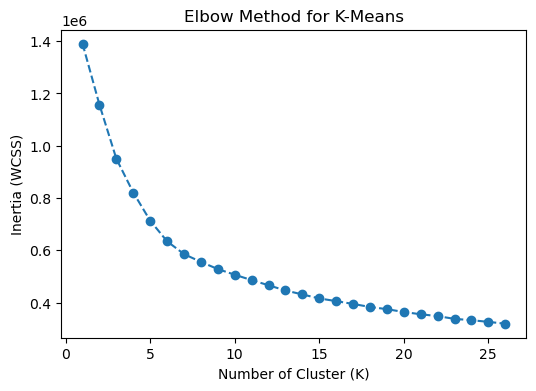

In [17]:
k_values = range(1,27)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for K-Means')
plt.show()